In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.zip to IMDB Dataset.zip


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Loading Dataset

In [4]:
df = pd.read_csv("IMDB Dataset.zip")
# printing first 5 rows
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive



Cleaning the review text.

In [5]:
import re

def clean_text(text):
    text = re.sub('<.*?>', '', text)       # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower()                    # Convert to lowercase
    return text

df['review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


Extraction of Text and Labels

In [6]:
X = df['review']
y = df['sentiment'].map({'positive' : 1, 'negative' : 0})

Text Vectorization

In [7]:
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
X_tfidf = tfidf.fit_transform(X)

Splitting of Dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size = 0.2, random_state = 42
)

Training the model

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Prediction and Report

In [10]:
y_pred = model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



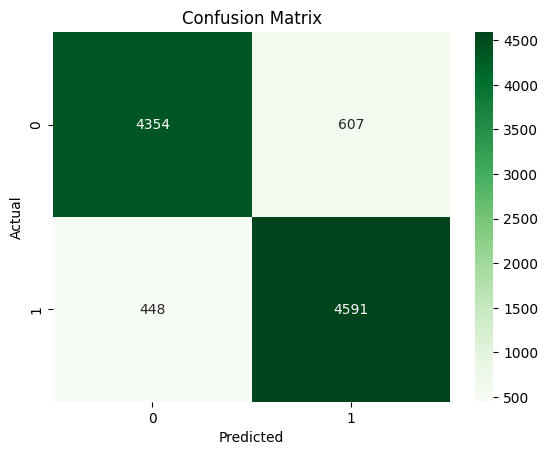

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation
We evaluate the classifier using accuracy score, classification report, and confusion matrix.

Accuracy Score: 0.8945


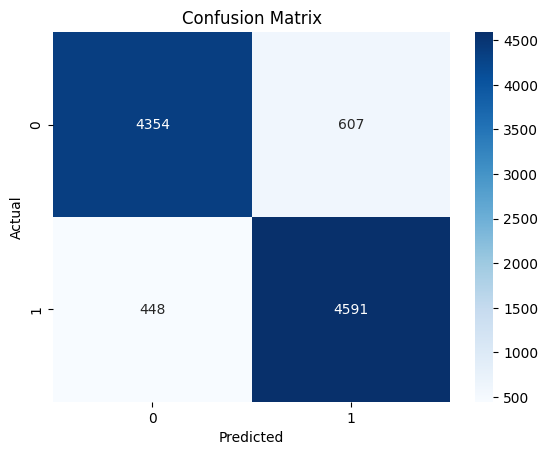

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
